In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from cmath import nan
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score, plot_roc_curve
from sklearn.metrics import matthews_corrcoef
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegressionCV

# EDA

In [ ]:
# read in file from guthub
data = pd.read_excel("https://github.com/plmorris/XGBoost-Group-5/blob/main/Implementation/Pumpkin_Seeds_Dataset.xlsx?raw=true")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               2500 non-null   int64  
 1   Perimeter          2500 non-null   float64
 2   Major_Axis_Length  2500 non-null   float64
 3   Minor_Axis_Length  2500 non-null   float64
 4   Convex_Area        2500 non-null   int64  
 5   Equiv_Diameter     2500 non-null   float64
 6   Eccentricity       2500 non-null   float64
 7   Solidity           2500 non-null   float64
 8   Extent             2500 non-null   float64
 9   Roundness          2500 non-null   float64
 10  Aspect_Ration      2500 non-null   float64
 11  Compactness        2500 non-null   float64
 12  Class              2500 non-null   object 
dtypes: float64(10), int64(2), object(1)
memory usage: 254.0+ KB


In [ ]:
data.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,Çerçevelik
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,Çerçevelik
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,Çerçevelik
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,Çerçevelik
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,Çerçevelik


In [ ]:
data["Class"].unique()

array(['Çerçevelik', 'Ürgüp Sivrisi'], dtype=object)

In [ ]:
# map Class column values to 0 and 1
num_dict = {'Çerçevelik': 0, 'Ürgüp Sivrisi': 1}
data["Class"] = data["Class"].apply(lambda x: num_dict[x])
# change class column to numeric 
data["Class"] = data["Class"].astype(int)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f141e8d7ad0>,
      dtype=object)

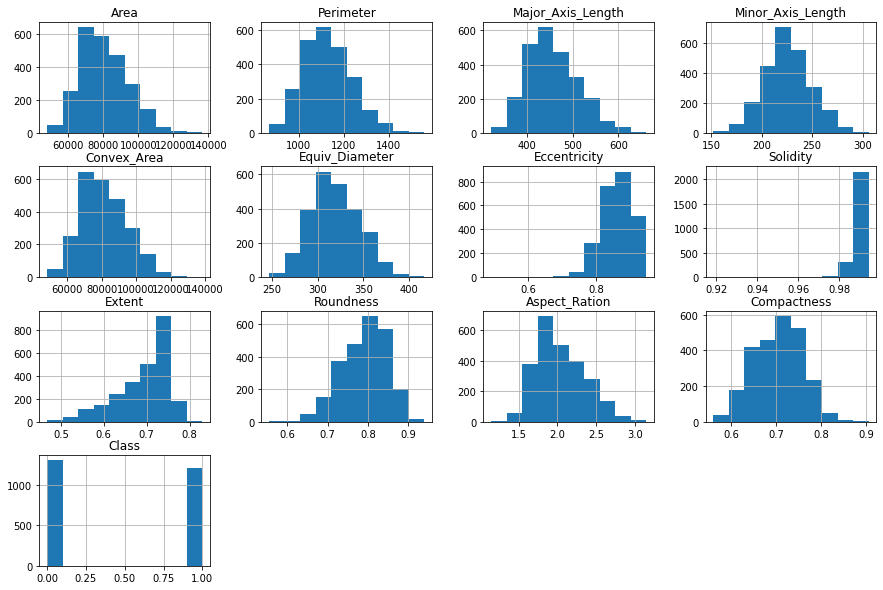

In [ ]:
# show histograms of features
data.hist(figsize=(15,10))

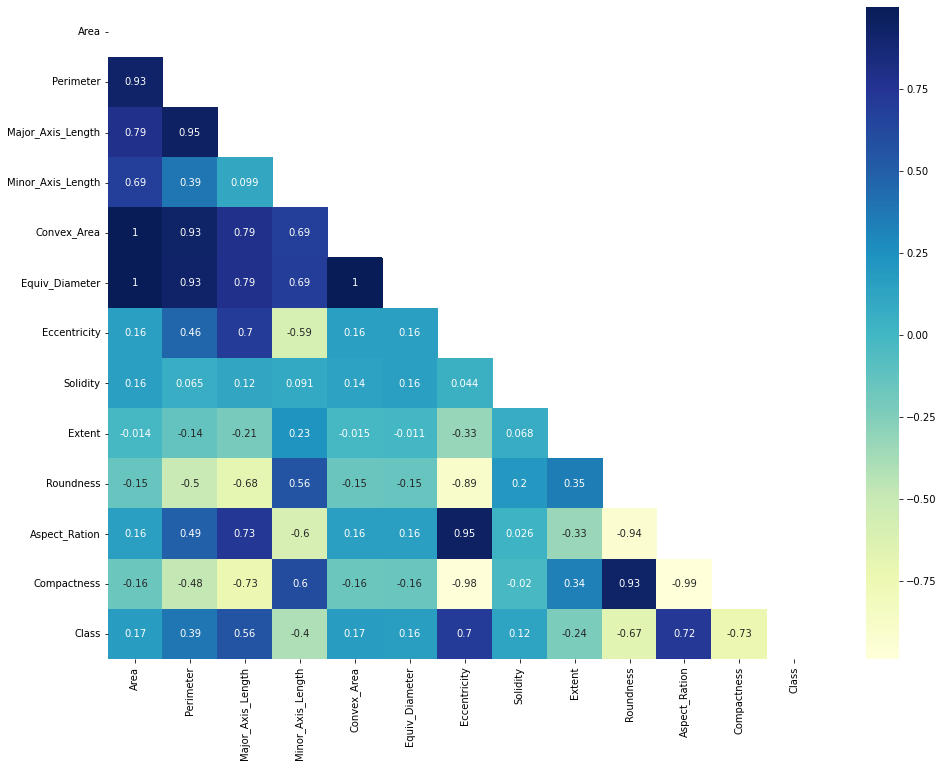

In [ ]:
# Plot a triangle correlation matrix heatmap
fig, ax = plt.subplots(figsize=(16, 12))

mask = np.triu(np.ones_like(data.corr()))
 
# plotting a triangle correlation heatmap
dataplot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True, mask=mask)
 
# displaying heatmap
plt.show()

In [ ]:
# get descriptive stats for columns
data.describe()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.0000
mean,80658.220800,1130.279015,456.601840,225.794921,81508.084400,319.334230,0.860879,0.989492,0.693205,0.791533,2.041702,0.704121,0.4800
std,13664.510228,109.256418,56.235704,23.297245,13764.092788,26.891920,0.045167,0.003494,0.060914,0.055924,0.315997,0.053067,0.4997
min,47939.000000,868.485000,320.844600,152.171800,48366.000000,247.058400,0.492100,0.918600,0.468000,0.554600,1.148700,0.560800,0.0000
25%,70765.000000,1048.829750,414.957850,211.245925,71512.000000,300.167975,0.831700,0.988300,0.658900,0.751900,1.801050,0.663475,0.0000
50%,79076.000000,1123.672000,449.496600,224.703100,79872.000000,317.305350,0.863700,0.990300,0.713050,0.797750,1.984200,0.707700,0.0000
75%,89757.500000,1203.340500,492.737650,240.672875,90797.750000,338.057375,0.897025,0.991500,0.740225,0.834325,2.262075,0.743500,1.0000
max,136574.000000,1559.450000,661.911300,305.818000,138384.000000,417.002900,0.948100,0.994400,0.829600,0.939600,3.144400,0.904900,1.0000


### Check outliers from data

Column: Area
Mean: 80658.2208
Lower Bound: 39664.69011485359, Upper bound: 121651.75148514641
Outlier count: 13


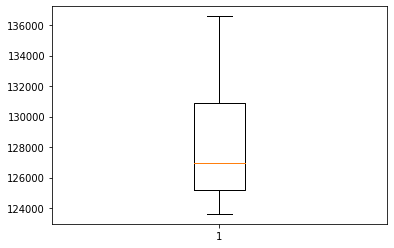

Column: Perimeter
Mean: 1130.2790148
Lower Bound: 802.5097615533637, Upper bound: 1458.0482680466362
Outlier count: 8


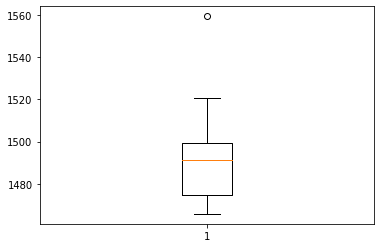

Column: Major_Axis_Length
Mean: 456.60184015999994
Lower Bound: 287.8947283105457, Upper bound: 625.3089520094542
Outlier count: 8


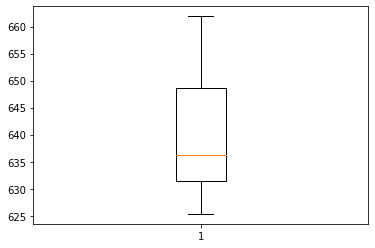

Column: Minor_Axis_Length
Mean: 225.79492116
Lower Bound: 155.9031874262545, Upper bound: 295.6866548937455
Outlier count: 9


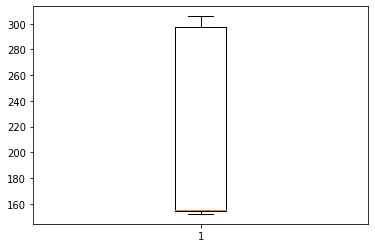

Column: Convex_Area
Mean: 81508.0844
Lower Bound: 40215.80603522445, Upper bound: 122800.36276477556
Outlier count: 13


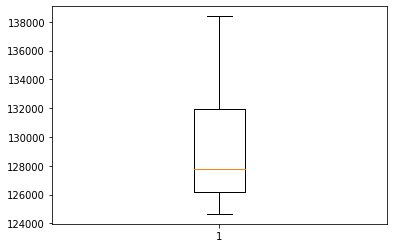

Column: Equiv_Diameter
Mean: 319.33423
Lower Bound: 238.6584708105686, Upper bound: 400.0099891894314
Outlier count: 9


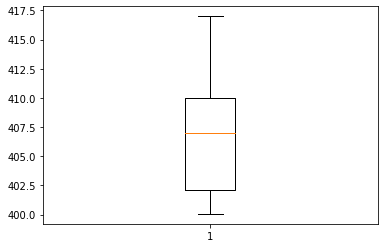

Column: Eccentricity
Mean: 0.8608794
Lower Bound: 0.7253772044356435, Upper bound: 0.9963815955643565
Outlier count: 14


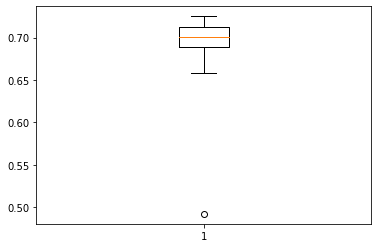

Column: Solidity
Mean: 0.9894915999999999
Lower Bound: 0.9790108229469826, Upper bound: 0.9999723770530172
Outlier count: 29


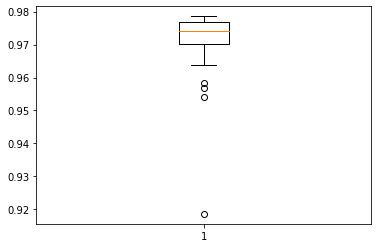

Column: Extent
Mean: 0.69320452
Lower Bound: 0.5104635759037573, Upper bound: 0.8759454640962426
Outlier count: 13


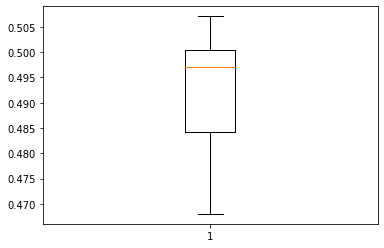

Column: Roundness
Mean: 0.7915327599999998
Lower Bound: 0.6237609201306616, Upper bound: 0.959304599869338
Outlier count: 4


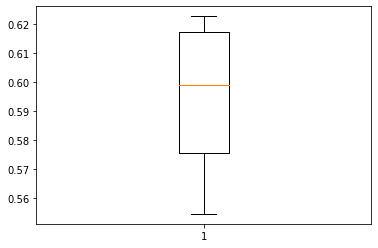

Column: Aspect_Ration
Mean: 2.04170232
Lower Bound: 1.0937116685072308, Upper bound: 2.9896929714927696
Outlier count: 8


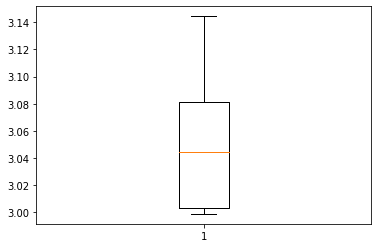

Column: Compactness
Mean: 0.70412052
Lower Bound: 0.5449198651968168, Upper bound: 0.8633211748031833
Outlier count: 2


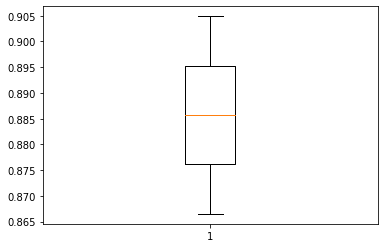

Column: Class
Mean: 0.48
Lower Bound: -1.0190993694774964, Upper bound: 1.9790993694774963
Outlier count: 0


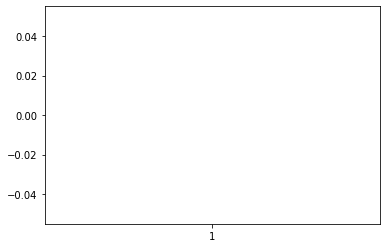

In [ ]:
# print out boxplot of outliers for each columns
for column in data.columns:
    if(pd.api.types.is_numeric_dtype(data[column])):
        mean = data[column].mean()
        std = data[column].std()
        new_df = data[(data[column] < (mean - 3 * std)) | (data[column] > (mean + 3 * std))]
        print("===========================================")
        print(f"Column: {column}")
        print(f"Mean: {mean}")
        print(f"Lower Bound: {mean - 3 * std}, Upper bound: {mean + 3 * std}")
        print(f"Outlier count: {new_df.shape[0]}")
        plt.boxplot(new_df[column])
        plt.show()
        print("===========================================")

# Feature engineering/model optimization
Note: testing steps are commented out and the final data is optimized based on test findings in last cell of this section

### Does removing outliers improve the model's performance?

In [ ]:
# # Test model without outlier removal
# # fit model with SVC classification method and default parameters kernel = rbf, c=1, gamma=scale
# data = pd.read_excel("https://github.com/plmorris/XGBoost-Group-5/blob/main/Implementation/Pumpkin_Seeds_Dataset.xlsx?raw=true")

# data = pd.get_dummies(data,columns=['Class'],drop_first=True)

# # separate independent from depenedent variables
# y = data["Class_Ürgüp Sivrisi"]
# X = data.drop(["Class_Ürgüp Sivrisi"], axis=1)
# # train test split
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.25)
# print("Testing model without outlier removal")
# print("=====================================")
# clf = svm.SVC()
# clf.fit(X_train, y_train)
# # predictions
# predictions = clf.predict(X_test)
# # describe results of confusion matrix
# tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
# print(f'Correctly classified Ürgüp Sivrisi: {tp}')
# print(f'Incorrectly classified Ürgüp Sivrisi: {fp}')
# print(f'Correctly classified Çerçevelik: {tn}')
# print(f'Incorrectly classified Çerçevelik: {fn}')
# cr = classification_report(y_test, predictions)
# print(cr)
# # print mathews coefficient
# print(f' Matthews Coefficient: {matthews_corrcoef(y_test, predictions)}')

In [ ]:
# # Test model with outlier removal
# # fit model with SVC classification method and default parameters kernel = rbf, c=1, gamma=scale
# print("Testing model with outlier removal")
# print("=====================================")
# data = pd.read_excel("https://github.com/plmorris/XGBoost-Group-5/blob/main/Implementation/Pumpkin_Seeds_Dataset.xlsx?raw=true")

# # remove outliers for each column if value is greater than 3 standard deviations from the mean
# # change each outlier to np.nan
# for column in data.columns:
#     if(pd.api.types.is_numeric_dtype(data[column])):
#         mean = data[column].mean()
#         std = data[column].std()
#         data[column] = data[column].apply(lambda x: np.nan if (x < (mean - 3 * std)) | (x > (mean + 3 * std)) else x)
# # create new df with outlier rows cleaned
# data_clean_outliers = data.dropna()

# # separate independent from depenedent variables
# y = data_clean_outliers["Class"]
# X = data_clean_outliers.drop(["Class"], axis=1)
# # train test split
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.25)
# clf = svm.SVC()
# clf.fit(X_train, y_train)
# # predictions
# predictions = clf.predict(X_test)
# # describe results of confusion matrix
# tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
# print(f'Correctly classified Ürgüp Sivrisi: {tp}')
# print(f'Incorrectly classified Ürgüp Sivrisi: {fp}')
# print(f'Correctly classified Çerçevelik: {tn}')
# print(f'Incorrectly classified Çerçevelik: {fn}')
# cr = classification_report(y_test, predictions)
# print(cr)
# # print matthews coefficient
# print(f' Matthews Coefficient: {matthews_corrcoef(y_test, predictions)}')

### Does scaling the data improve the model's performance?

In [ ]:
# # Test model without scaling
# # fit model with SVC classification method and default parameters kernel = rbf, c=1, gamma=scale
# data = pd.read_excel("https://github.com/plmorris/XGBoost-Group-5/blob/main/Implementation/Pumpkin_Seeds_Dataset.xlsx?raw=true")
# # separate independent from depenedent variables
# y = data["Class"]
# X = data.drop(["Class"], axis=1)
# # train test split
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.25)
# print("Testing model without scaling")
# print("#############################")
# clf = svm.SVC()
# clf.fit(X_train, y_train)
# # predictions
# predictions = clf.predict(X_test)
# # describe results of confusion matrix
# tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
# print(f'Correctly classified Ürgüp Sivrisi: {tp}')
# print(f'Incorrectly classified Ürgüp Sivrisi: {fp}')
# print(f'Correctly classified Çerçevelik: {tn}')
# print(f'Incorrectly classified Çerçevelik: {fn}')
# cr = classification_report(y_test, predictions)
# print(cr)
# # print mathews coefficient
# print(f' Matthews Coefficient: {matthews_corrcoef(y_test, predictions)}')

In [ ]:
# # Test model with scaling
# # fit model with SVC classification method and default parameters kernel = rbf, c=1, gamma=scale
# data = pd.read_excel("https://github.com/plmorris/XGBoost-Group-5/blob/main/Implementation/Pumpkin_Seeds_Dataset.xlsx?raw=true")
# # separate independent from depenedent variables
# y = data["Class"]
# X = data.drop(["Class"], axis=1)
# # train-test split with scaling
# X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)
# scaler=StandardScaler()
# scaler.fit(X_train)
# X_train=scaler.transform(X_train)
# X_test=scaler.transform(X_test)
# print("Testing model with scaling")
# print("#############################")
# clf = svm.SVC()
# clf.fit(X_train, y_train)
# # predictions
# predictions = clf.predict(X_test)
# # describe results of confusion matrix
# tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
# print(f'Correctly classified Ürgüp Sivrisi: {tp}')
# print(f'Incorrectly classified Ürgüp Sivrisi: {fp}')
# print(f'Correctly classified Çerçevelik: {tn}')
# print(f'Incorrectly classified Çerçevelik: {fn}')
# cr = classification_report(y_test, predictions)
# print(cr)
# # print mathews coefficient
# print(f' Matthews Coefficient: {matthews_corrcoef(y_test, predictions)}')

### Does removing features with low correlation to Class improve the model's performance?

In [ ]:
# # Test model with all features
# # fit model with SVC classification method and default parameters kernel = rbf, c=1, gamma=scale
# data = pd.read_excel("https://github.com/plmorris/XGBoost-Group-5/blob/main/Implementation/Pumpkin_Seeds_Dataset.xlsx?raw=true")
# # separate independent from depenedent variables
# y = data["Class"]
# X = data.drop(["Class"], axis=1)
# # train test split
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.25)
# print("Testing model with all features inlcuded")
# print("#############################")
# clf = svm.SVC()
# clf.fit(X_train, y_train)
# # predictions
# predictions = clf.predict(X_test)
# # describe results of confusion matrix
# tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
# print(f'Correctly classified Ürgüp Sivrisi: {tp}')
# print(f'Incorrectly classified Ürgüp Sivrisi: {fp}')
# print(f'Correctly classified Çerçevelik: {tn}')
# print(f'Incorrectly classified Çerçevelik: {fn}')
# cr = classification_report(y_test, predictions)
# print(cr)
# # print mathews coefficient
# print(f' Matthews Coefficient: {matthews_corrcoef(y_test, predictions)}')

In [ ]:
# # Test model with features over magnitude 0.5 correlation with class
# # fit model with SVC classification method and default parameters kernel = rbf, c=1, gamma=scale
# data = pd.read_excel("https://github.com/plmorris/XGBoost-Group-5/blob/main/Implementation/Pumpkin_Seeds_Dataset.xlsx?raw=true")
# # remove low correlation features
# data_high_corr = data[['Major_Axis_Length', 'Eccentricity', 'Roundness', 'Aspect_Ration', 'Compactness', 'Class']]
# # separate independent from depenedent variables
# y = data_high_corr["Class"]
# X = data_high_corr.drop(["Class"], axis=1)
# # train test split
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.25)
# print("Testing model after removing low correlation features")
# print("#############################")
# clf = svm.SVC()
# clf.fit(X_train, y_train)
# # predictions
# predictions = clf.predict(X_test)
# # describe results of confusion matrix
# tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
# print(f'Correctly classified Ürgüp Sivrisi: {tp}')
# print(f'Incorrectly classified Ürgüp Sivrisi: {fp}')
# print(f'Correctly classified Çerçevelik: {tn}')
# print(f'Incorrectly classified Çerçevelik: {fn}')
# cr = classification_report(y_test, predictions)
# print(cr)
# # print mathews coefficient
# print(f' Matthews Coefficient: {matthews_corrcoef(y_test, predictions)}')

### Create clean dataframe with outliers removed, scaling and only high correlation features

In [ ]:
data = pd.read_excel("https://github.com/plmorris/XGBoost-Group-5/blob/main/Implementation/Pumpkin_Seeds_Dataset.xlsx?raw=true")

# remove low correlation features
data_high_corr = data.loc[:,['Major_Axis_Length', 'Eccentricity', 'Roundness', 'Aspect_Ration', 'Compactness', 'Class']]

# remove outliers for each column if value is greater than 3 standard deviations from the mean
# change each outlier to np.nan
for column in data_high_corr.columns:
    if (pd.api.types.is_numeric_dtype(data_high_corr[column])):
        mean = data_high_corr[column].mean()
        std = data_high_corr[column].std()
        data_high_corr[column] = data_high_corr[column].apply(lambda x: np.nan if (x < (mean - 3 * std)) | (x > (mean + 3 * std)) else x)
# create new df with outlier rows cleaned
data_clean = data_high_corr.dropna()

data_clean = pd.get_dummies(data_clean,columns=['Class'],drop_first=True)

# separate X and y
y = data_clean["Class_Ürgüp Sivrisi"]
X = data_clean.drop(["Class_Ürgüp Sivrisi"], axis=1)
# train-test split with scaling
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)
scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

# initialize model
clf = svm.SVC(probability=True)
clf.fit(X_train, y_train)
# predictions
predictions = clf.predict(X_test)
# describe results of confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
print("Cleaned data test model")
print("=======================")
print(f'Correctly classified Ürgüp Sivrisi: {tp}')
print(f'Incorrectly classified Ürgüp Sivrisi: {fp}')
print(f'Correctly classified Çerçevelik: {tn}')
print(f'Incorrectly classified Çerçevelik: {fn}')
cr = classification_report(y_test, predictions)
print(cr)
# print mathews coefficient
print(f' Matthews Coefficient: {matthews_corrcoef(y_test, predictions)}')

Cleaned data test model
Correctly classified Ürgüp Sivrisi: 255
Incorrectly classified Ürgüp Sivrisi: 26
Correctly classified Çerçevelik: 285
Incorrectly classified Çerçevelik: 51
              precision    recall  f1-score   support

           0       0.85      0.92      0.88       311
           1       0.91      0.83      0.87       306

    accuracy                           0.88       617
   macro avg       0.88      0.87      0.87       617
weighted avg       0.88      0.88      0.87       617

 Matthews Coefficient: 0.7527039310742131


# Modeling

### SVM model with default parameters

SVM Model with default parameters
Correctly classified Ürgüp Sivrisi: 249
Incorrectly classified Ürgüp Sivrisi: 28
Correctly classified Çerçevelik: 292
Incorrectly classified Çerçevelik: 48
              precision    recall  f1-score   support

           0       0.86      0.91      0.88       320
           1       0.90      0.84      0.87       297

    accuracy                           0.88       617
   macro avg       0.88      0.88      0.88       617
weighted avg       0.88      0.88      0.88       617

 Matthews Coefficient: 0.7543043767782074


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


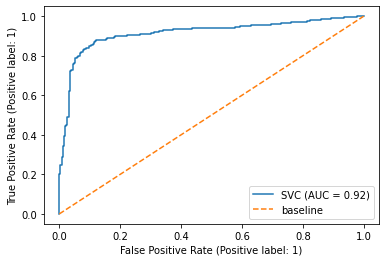

In [ ]:
# fit model with SVC classification method and default parameters kernel = rbf, c=1, gamma=scale
clf = svm.SVC()
clf.fit(X_train, y_train)
# print confusion matrix
predictions = clf.predict(X_test)
# describe results of confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
print("SVM Model with default parameters")
print("=================================")
print(f'Correctly classified Ürgüp Sivrisi: {tp}')
print(f'Incorrectly classified Ürgüp Sivrisi: {fp}')
print(f'Correctly classified Çerçevelik: {tn}')
print(f'Incorrectly classified Çerçevelik: {fn}')
# print classification report
cr = classification_report(y_test, predictions)
print(cr)
# print mathews coefficient
print(f' Matthews Coefficient: {matthews_corrcoef(y_test, predictions)}')
# ROC curve
plot_roc_curve(clf, X_test, y_test);

# add worst case scenario line
plt.plot([0, 1], [0,1],
    label='baseline', linestyle='--')

# add a legend
plt.legend();
plt.show();

### Compare SVM to logistic regression

Logistic Model with default parameters
Correctly classified Ürgüp Sivrisi: 230
Incorrectly classified Ürgüp Sivrisi: 28
Correctly classified Çerçevelik: 314
Incorrectly classified Çerçevelik: 45
 Matthews Coefficient: 0.7602862384373131
              precision    recall  f1-score   support

           0       0.87      0.92      0.90       342
           1       0.89      0.84      0.86       275

    accuracy                           0.88       617
   macro avg       0.88      0.88      0.88       617
weighted avg       0.88      0.88      0.88       617



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


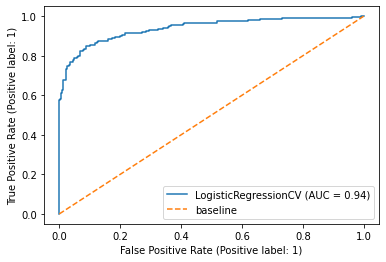

In [ ]:
 # fit model with logistic classification method and default parameters
log_model = LogisticRegressionCV(max_iter=100)
log_model.fit(X_train, y_train)
# print confusion matrix
predictions = log_model.predict(X_test)
# explain confusion matrix result
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
print("Logistic Model with default parameters")
print("=================================")
print(f'Correctly classified Ürgüp Sivrisi: {tp}')
print(f'Incorrectly classified Ürgüp Sivrisi: {fp}')
print(f'Correctly classified Çerçevelik: {tn}')
print(f'Incorrectly classified Çerçevelik: {fn}')
print(f' Matthews Coefficient: {matthews_corrcoef(y_test, predictions)}')
# print classification report
cr = classification_report(y_test, predictions)
print(cr)
# ROC curve
plot_roc_curve(log_model, X_test, y_test);

# add worst case scenario line
plt.plot([0, 1], [0,1],
    label='baseline', linestyle='--')

# add a legend
plt.legend();
plt.show();

# Parameter testing

### Polynomial kernel

In [ ]:
# fit model with SVC classification method and polynomial kernel
# has two parameters, constant c, and degree of freedom d
# larger value of d will make the decision boundary more complex, might result in overfitting, int and default value = 3
# 

clf = svm.SVC(kernel="poly", degree=3, probability = True)
clf.fit(X_train, y_train)

SVC(kernel='poly', probability=True)

### RBF (Gaussian) kernel

In [ ]:
# fit model with RBF (aka Gaussian) kernel
# creates more complex gaussian boundary
# one parameter gamma, if gamma=scale then 1/(n_features*X.var()), if gamma=auto then 1/n_features
# small value of gamma will make model behave like linear SVM
# large value of gamma will make model heavily impacted by support vectos, possibly resulting in overfitting

clf = svm.SVC(kernel="rbf", gamma="auto", probability = True)
clf.fit(X_train, y_train)

SVC(gamma='auto')

Regularization

In [ ]:
#Use different C values to find the optimal value
#C = 1.0 (default)
clf = svm.SVC(probability=True)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.899513776337115

In [ ]:
#C=9.0
clf = svm.SVC(C=9.0,probability=True)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9076175040518638

In [ ]:
#C=100
#A little more accurate, however this is likely overfitted due to the large C value
clf = svm.SVC(C=100,probability=True)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9076175040518638

ROC AUC

0.929964483113717


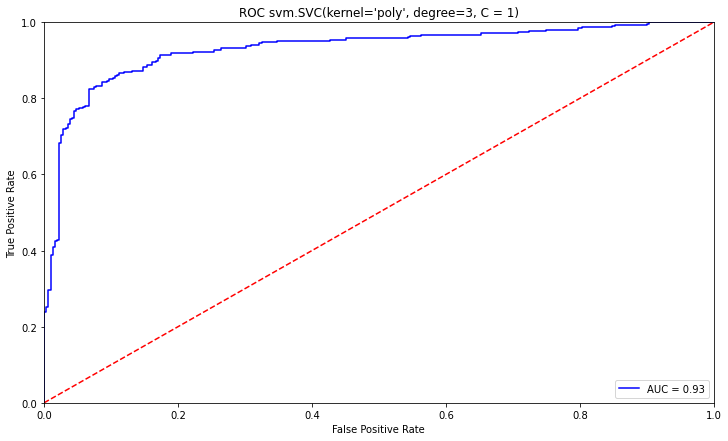

In [ ]:
import sklearn.metrics as metrics
from sklearn.metrics import roc_auc_score
# calculate the fpr and tpr for all thresholds of the classification
# clf = svm.SVC(probability=True)
# clf.fit(X_train, y_train)
probs = clf.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
print(roc_auc_score(y_test, preds))
plt.figure(figsize=(12,7))
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("ROC svm.SVC(kernel='poly', degree=3, C = 1)")
plt.show()

SVM 2D Plots

Note: These plots were made with the raw data, not the highly correlated only data. Therefore, column numbers specified do not always match. Please uncomment and run the section on "Test model without outlier removal" to allow the following to work.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import svm, datasets
from sklearn.svm import SVC

In [ ]:
def decision_boundary(X,y,model,res,test_idx=None):
    markers=['s','o','x']
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    colormap=ListedColormap(colors[:len(np.unique(y))])
    x_min,x_max=X[:,0].min()-1,X[:,0].max()+1
    y_min,y_max=X[:,1].min()-1,X[:,1].max()+1
    xx,yy=np.meshgrid(np.arange(x_min,x_max,res),np.arange(y_min,y_max,res))
    z=model.predict(np.c_[xx.ravel(), yy.ravel()])
    zz=z.reshape(xx.shape)
    plt.pcolormesh(xx,yy,zz,cmap=colormap)

    for idx,cl in enumerate(np.unique(y)):
        plt.scatter(X[y==cl,0],X[y==cl,1],c=colors[idx],cmap=plt.cm.Paired, edgecolors='k',marker=markers[idx],label=cl,alpha=0.8)

In [ ]:
X_train_df = pd.DataFrame(X_train)
X_train_input = X_train_df.iloc[:,0:2]
X_test_df = pd.DataFrame(X_test)
X_test_input = X_test_df.iloc[:,0:2]

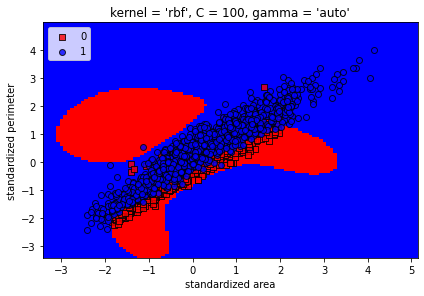

In [ ]:
model=SVC(C=100)
model.fit(X_train_input,y_train)
decision_boundary(np.vstack((X_train_input,X_test_input)),np.hstack((y_train,y_test)),model,0.08,test_idx=None)
plt.xlabel('standardized area')
plt.ylabel('standardized perimeter')
plt.legend(loc='upper left')
plt.tight_layout()
plt.title("kernel = 'rbf', C = 100, gamma = 'auto'")
plt.show()

In [ ]:
X

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557
...,...,...,...,...,...,...,...,...,...,...,...,...
2495,79637,1224.710,533.1513,190.4367,80381,318.4289,0.9340,0.9907,0.4888,0.6672,2.7996,0.5973
2496,69647,1084.318,462.9416,191.8210,70216,297.7874,0.9101,0.9919,0.6002,0.7444,2.4134,0.6433
2497,87994,1210.314,507.2200,222.1872,88702,334.7199,0.8990,0.9920,0.7643,0.7549,2.2828,0.6599
2498,80011,1182.947,501.9065,204.7531,80902,319.1758,0.9130,0.9890,0.7374,0.7185,2.4513,0.6359


In [ ]:
X_train_ecc_ar = X_train_df[[2,9]]
X_test_ecc_ar = X_test_df[[2,9]]

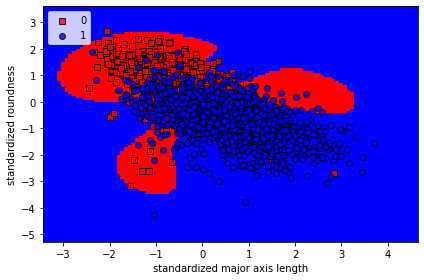

In [ ]:
model=SVC(C=100,gamma='scale')
model.fit(X_train_input,y_train)
decision_boundary(np.vstack((X_train_ecc_ar,X_test_ecc_ar)),np.hstack((y_train,y_test)),model,0.08,test_idx=None)
plt.xlabel('standardized major axis length')
plt.ylabel('standardized roundness')
plt.legend(loc='upper left')
# plt.axis([-10, 2, -3, 4])
plt.tight_layout()
plt.show()

In [ ]:
X_train_comp_r = X_train_df[[9,11]] # roundness, compactness
X_test_comp_r = X_test_df[[9,11]]

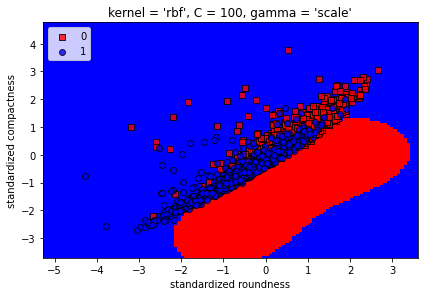

In [ ]:
model=SVC(C=1,kernel='rbf')
model.fit(X_train_input,y_train)
decision_boundary(np.vstack((X_train_comp_r,X_test_comp_r)),np.hstack((y_train,y_test)),model,0.08,test_idx=None)
plt.xlabel('standardized roundness')
plt.ylabel('standardized compactness')
plt.legend(loc='upper left')
plt.tight_layout()
plt.title("kernel = 'rbf', C = 100, gamma = 'scale'")
plt.show()

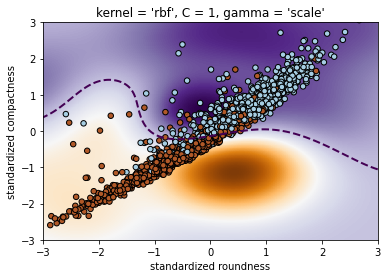

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

xx, yy = np.meshgrid(np.linspace(-3, 3, 500), np.linspace(-3, 3, 500))
# np.random.seed(0)
# X = np.random.randn(300, 2)
# Y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)

# fit the model
clf = svm.SVC(C=1,gamma="scale")
clf.fit(X_train_comp_r, y_train)

# plot the decision function for each datapoint on the grid
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    aspect="auto",
    origin="lower",
    cmap=plt.cm.PuOr_r,
)
contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2, linestyles="dashed")
plt.scatter(X_train_comp_r.iloc[:, 0], X_train_comp_r.iloc[:, 1], s=30, c=y_train, cmap=plt.cm.Paired, edgecolors="k")
# plt.legend()
plt.xticks()
plt.yticks()
plt.axis([-3, 3, -3, 3])
plt.title("kernel = 'rbf', C = 1, gamma = 'scale'")
plt.xlabel('standardized roundness')
plt.ylabel('standardized compactness')
plt.show()

In [ ]:
X

,Major_Axis_Length,Eccentricity,Roundness,Aspect_Ration,Compactness
0,326.1485,0.7376,0.8963,1.4809,0.8207
1,417.1932,0.8275,0.8440,1.7811,0.7487
2,435.8328,0.8749,0.7674,2.0651,0.6929
3,381.5638,0.8123,0.8486,1.7146,0.7624
4,383.8883,0.8187,0.8338,1.7413,0.7557
...,...,...,...,...,...
2495,533.1513,0.9340,0.6672,2.7996,0.5973
2496,462.9416,0.9101,0.7444,2.4134,0.6433
2497,507.2200,0.8990,0.7549,2.2828,0.6599
2498,501.9065,0.9130,0.7185,2.4513,0.6359


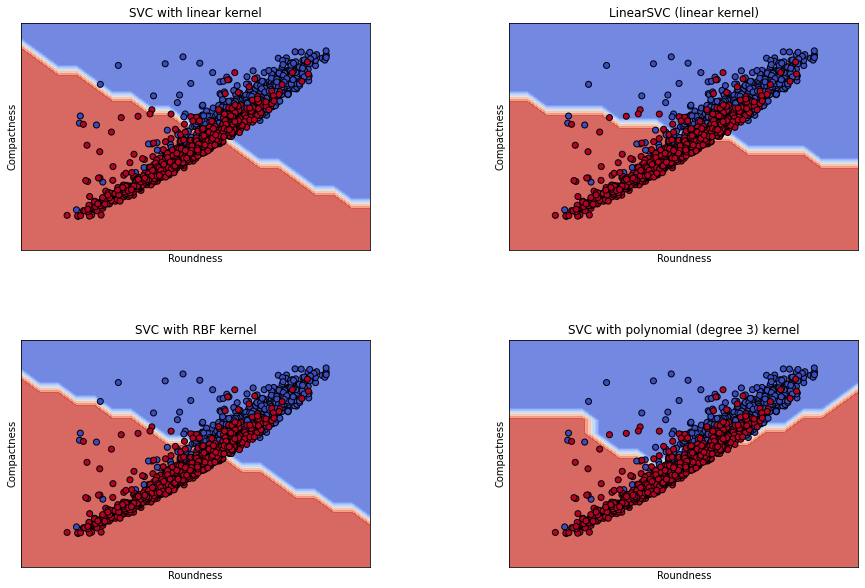

In [ ]:
X_ear = X[['Roundness','Compactness']]
C = 1.0  # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=C).fit(X_ear.values, y.values)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X_ear.values, y.values)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X_ear.values, y.values)
lin_svc = svm.LinearSVC(C=C).fit(X_ear.values, y.values)

# create a mesh to plot in
x_min, x_max = X_ear.iloc[:, 0].min() - 0.05, X_ear.iloc[:, 0].max() + 0.05
y_min, y_max = X_ear.iloc[:, 1].min() - 0.05, X_ear.iloc[:, 1].max() + 0.05
h = 0.02
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# title for the plots
titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']

plt.figure(figsize=(15,10))
for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(X_ear.iloc[:, 0], X_ear.iloc[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors="k")
    plt.xlabel('Roundness')
    plt.ylabel('Compactness')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()